## Import libraries

In [122]:
!pip install liac-arff

In [123]:
import pandas as pd # dataframe/data cleaning/manipulation
import numpy as np # array computations
import arff # read arff file
from matplotlib import pyplot as plt # plotting/graphing
from sklearn import tree # Decision tree algorithm
from sklearn.tree import plot_tree # plot model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score # plot evaluations
import requests # retrieve data from online

## Import Data

In [124]:
# get data from online
training_arff = requests.get('https://raw.githubusercontent.com/juwon0502/MIS-373-Predictive-Analytics/master/datasets/bank-training.arff')
testing_arff = requests.get('https://raw.githubusercontent.com/juwon0502/MIS-373-Predictive-Analytics/master/datasets/bank-NewCustomers.arff')

# read as arff file
training_arff = arff.load(training_arff.text)
testing_arff = arff.load(testing_arff.text)
col_val = [attribute[0] for attribute in training_arff['attributes']]

# transform arff file into pandas dataframe
training_df = pd.DataFrame(training_arff['data'], columns = col_val)
testing_df = pd.DataFrame(testing_arff['data'], columns = col_val)
meta = training_arff['attributes']

def clean_df(df):
  cols = list(df.columns)
  for col in cols:
    try:
      df = df.replace({col: {'YES': True, 'NO': False}})
    except:
      pass
    pass
  return df

training_df = clean_df(training_df)
training_df_dummy = pd.get_dummies(training_df)
testing_df_dummy = pd.get_dummies(clean_df(testing_df))

In [125]:
#training_df['sex'].unique()
#training_df.dtypes
training_df.loc[(training_df['region'] == 'TOWN')]

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
1,40.0,MALE,TOWN,30085.10,True,3.0,True,False,True,True,False
3,23.0,FEMALE,TOWN,20375.40,True,3.0,False,False,True,False,False
5,57.0,FEMALE,TOWN,37869.60,True,2.0,False,True,True,False,True
7,58.0,MALE,TOWN,24946.60,True,0.0,True,True,True,False,False
9,54.0,MALE,TOWN,24212.10,True,2.0,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
585,20.0,MALE,TOWN,9516.91,False,3.0,True,True,True,False,False
587,43.0,FEMALE,TOWN,31273.80,False,1.0,True,True,False,False,True
592,48.0,MALE,TOWN,20268.00,True,0.0,False,True,True,False,False
597,31.0,FEMALE,TOWN,15976.30,True,0.0,True,True,False,False,True


In [126]:
testing_df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,23.0,MALE,INNER_CITY,18766.90,YES,0.0,YES,YES,NO,YES,YES
1,30.0,MALE,RURAL,9915.67,NO,1.0,NO,YES,NO,YES,NO
2,45.0,FEMALE,RURAL,21881.60,NO,0.0,YES,YES,YES,NO,YES
3,50.0,MALE,TOWN,46794.40,YES,2.0,NO,YES,NO,YES,NO
4,41.0,FEMALE,INNER_CITY,20721.10,YES,0.0,YES,YES,YES,NO,NO


In [127]:
training_df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48.0,FEMALE,INNER_CITY,17546.0,False,1.0,False,False,False,False,True
1,40.0,MALE,TOWN,30085.1,True,3.0,True,False,True,True,False
2,51.0,FEMALE,INNER_CITY,16575.4,True,0.0,True,True,True,False,False
3,23.0,FEMALE,TOWN,20375.4,True,3.0,False,False,True,False,False
4,57.0,FEMALE,RURAL,50576.3,True,0.0,False,True,False,False,False


In [128]:
training_df_dummy.head()
# first 10 rows of cleaned training data

,age,income,married,children,car,save_act,current_act,mortgage,pep,sex_FEMALE,sex_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,48.0,17546.0,False,1.0,False,False,False,False,True,1,0,1,0,0,0
1,40.0,30085.1,True,3.0,True,False,True,True,False,0,1,0,0,0,1
2,51.0,16575.4,True,0.0,True,True,True,False,False,1,0,1,0,0,0
3,23.0,20375.4,True,3.0,False,False,True,False,False,1,0,0,0,0,1
4,57.0,50576.3,True,0.0,False,True,False,False,False,1,0,0,1,0,0


In [129]:
testing_df_dummy.head(10)
# first 10 rows of cleaned testing data

,age,income,married,children,car,save_act,current_act,mortgage,pep,sex_FEMALE,sex_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,23.0,18766.90,True,0.0,True,True,False,True,True,0,1,1,0,0,0
1,30.0,9915.67,False,1.0,False,True,False,True,False,0,1,0,1,0,0
2,45.0,21881.60,False,0.0,True,True,True,False,True,1,0,0,1,0,0
3,50.0,46794.40,True,2.0,False,True,False,True,False,0,1,0,0,0,1
4,41.0,20721.10,True,0.0,True,True,True,False,False,1,0,1,0,0,0
5,20.0,16688.50,False,1.0,False,True,True,True,False,0,1,1,0,0,0
6,46.0,39068.00,True,0.0,True,True,False,True,False,1,0,0,1,0,0
7,50.0,27740.80,True,1.0,True,True,False,True,True,1,0,1,0,0,0
8,42.0,33584.90,False,3.0,True,True,False,False,False,0,1,1,0,0,0
9,57.0,19621.30,True,1.0,True,False,True,False,True,1,0,0,0,0,1


## Visualize Attributes

In [130]:
def display_attribute(df, meta, col_name,bins=8):
  col_val = [item[0] for item in meta]
  pep = df.loc[df['pep'] == True]
  pep_col_name = []
  no_pep_col_name = []
  if type(meta[col_val.index(col_name)][1]) == list:
    labels = meta[col_val.index(col_name)][1]
    for label in labels:
      no_pep_col_name.append(len(df.loc[df[col_name] == label]))
      pep_col_name.append(len(pep.loc[pep[col_name] == label]))

  else:
    labels = []
    min_val = int(min(df[col_name]))
    max_val = int(max(df[col_name]))
    rg = max_val - min_val
    if rg < 12:
      for x in range(min_val, max_val + 1):
        no_pep_col_name.append(len(df.loc[df[col_name] == x]))
        pep_col_name.append(len(pep.loc[pep[col_name] == x]))
        labels.append(x)
    else:
      for y in range(min_val, max_val, (rg//bins)):
        no_pep_col_name.append(len(df.loc[df[col_name].between(y, y + (rg//8))]))
        pep_col_name.append(len(pep.loc[pep[col_name].between(y, y + (rg//8))]))
        labels.append(f"{y}-{y+(rg//8-1)}")

  if type(labels[0]) != str:
    labels = [str(label) for label in labels]
  plt.figure(dpi = 100)
  plt.rcParams.update({'font.size': 7})
  #current_values = plt.gca().get_xticks()
  # using format string '{:.0f}' here but you can choose others
  #plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


  plt.bar(labels, no_pep_col_name, label = 'No PEP',color='red')
  plt.bar(labels, pep_col_name, label = 'Yes PEP',color='blue')
  plt.legend()
  plt.title(f'{col_name} distribution')
  plt.show()

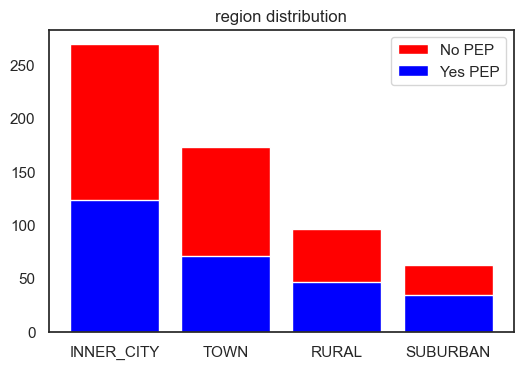

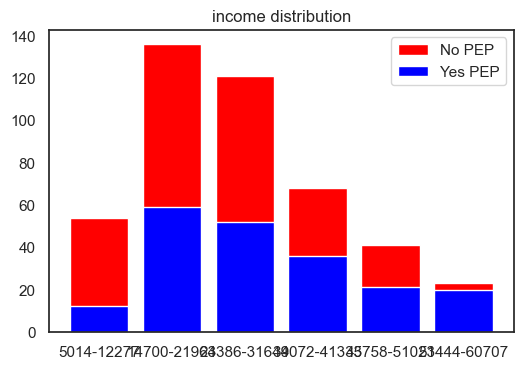

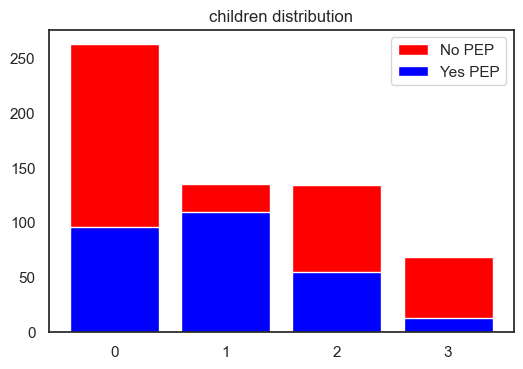

In [131]:
 # change the third parameter to change which attribute to display
display_attribute(training_df, meta, "region",10)
display_attribute(training_df, meta, "income",6)
display_attribute(training_df, meta, "children",10)

2D

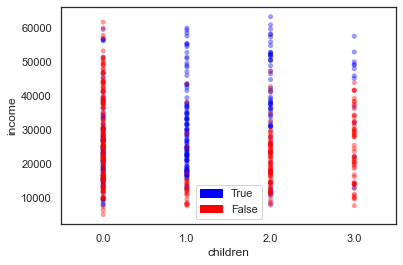

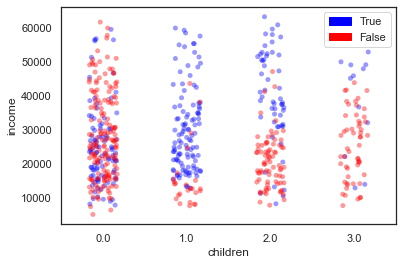

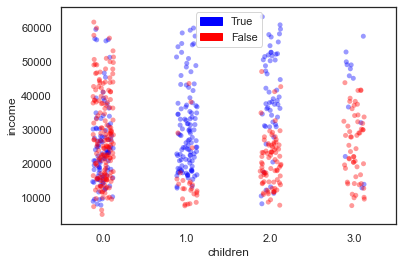

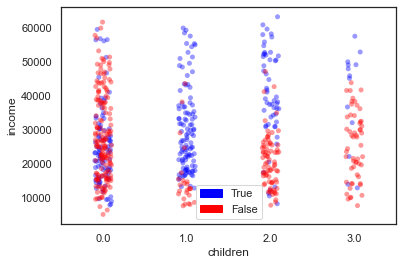

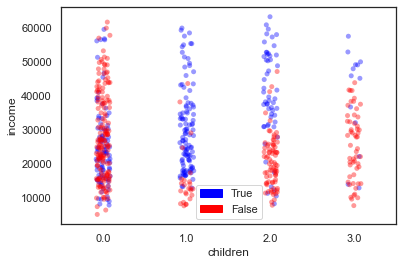

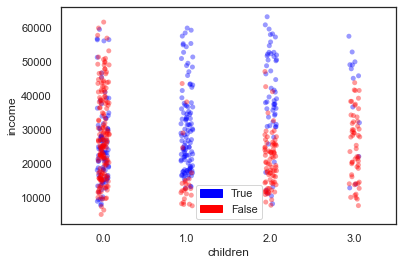

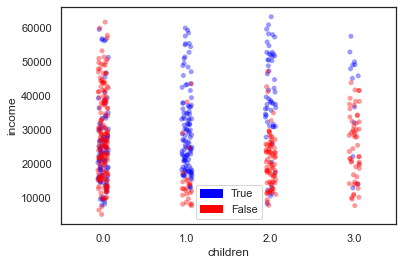

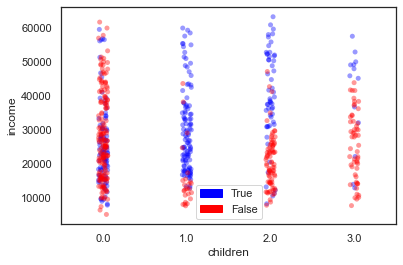

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt1
import matplotlib.patches as mpatches
%matplotlib inline
import warnings
def myscatterj(df,myx,myy,jitter=False):
    onlyT=df[df['pep'] == True]
    onlyT.head()
    onlyF=df[df['pep'] == False]
    onlyF.head()
    
    sns.set(style="white")
    sns.stripplot(x=myx, y=myy, data=onlyT,color="blue",jitter=jitter, alpha=.40)
    sns.stripplot(x=myx, y=myy, data=onlyF,color="red",jitter=jitter, alpha=.40)
    pop_a = mpatches.Patch(color='blue', label='True')
    pop_b = mpatches.Patch(color='red', label='False')
    plt1.legend(handles=[pop_a,pop_b])
    #plt.legend(["True" , "False"])
    #sns.despine()
    plt1.show()




myscatterj(training_df,'children','income')
for i in range(6,20,2):
  myscatterj(training_df,'children','income',1/i)

## Create Model

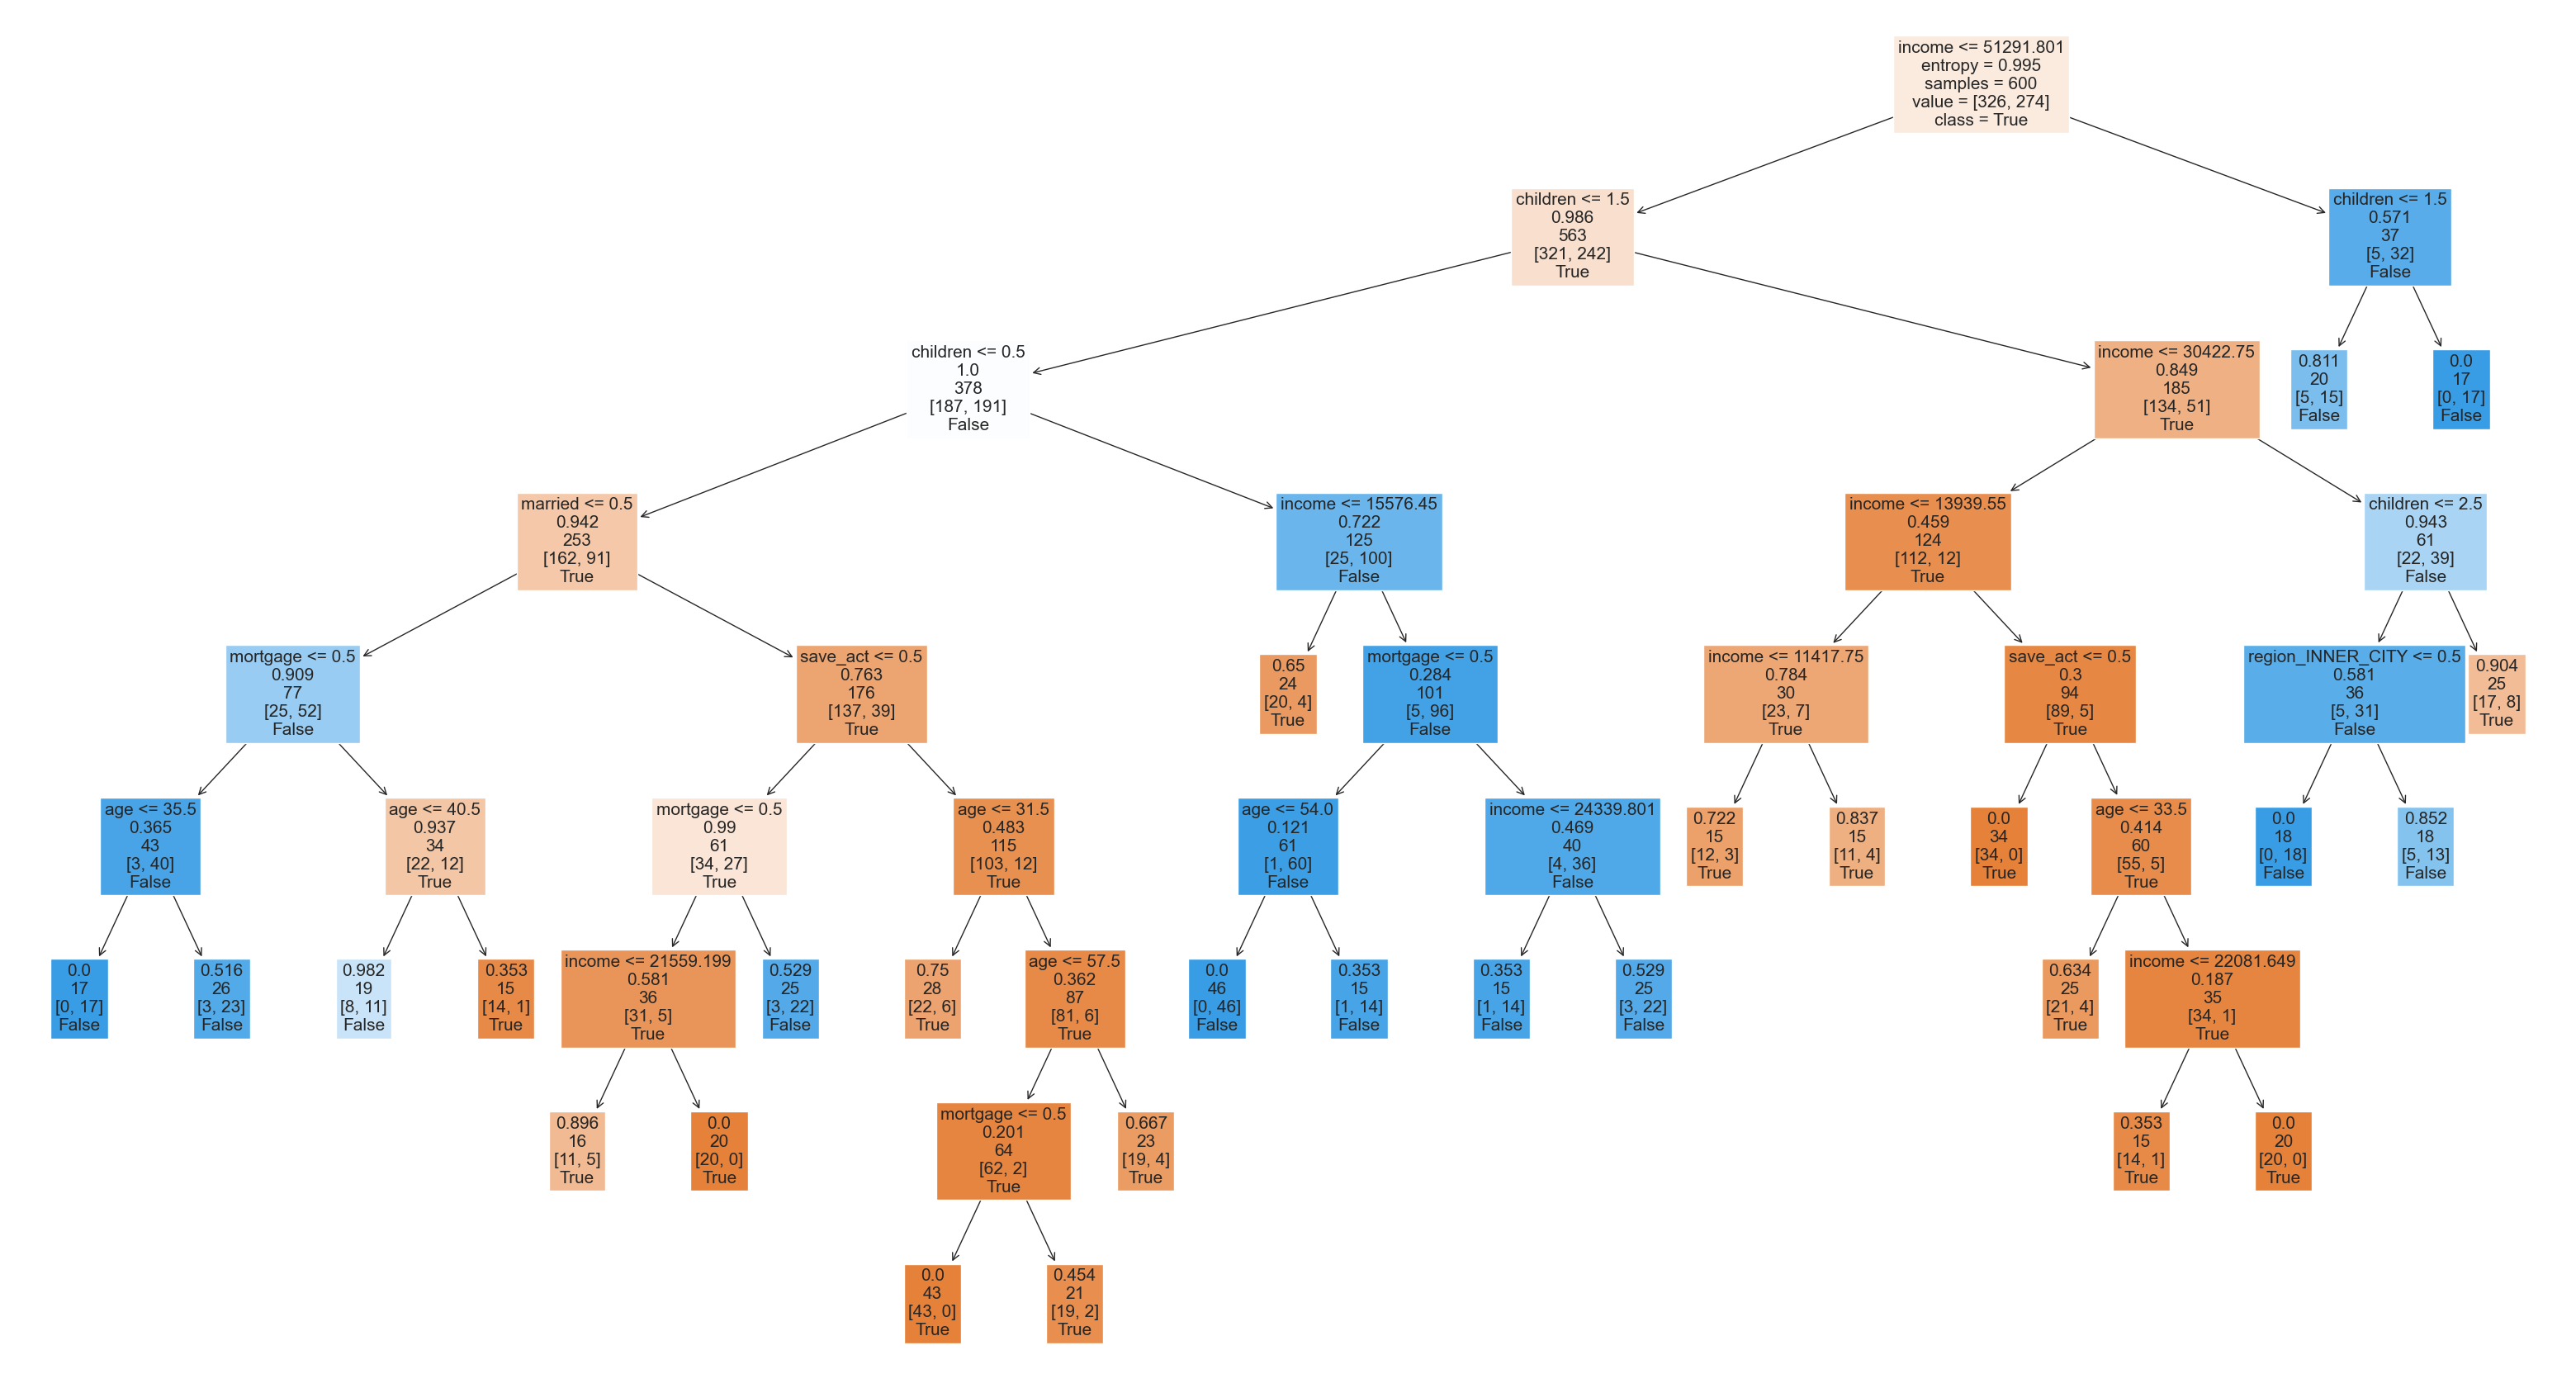

0.8816666666666667

In [133]:
X = training_df_dummy.drop(columns=['pep'])
y = training_df_dummy.pep

# varible to change depth of tree
#max_depth = int(input("What is the maximum depth you want? "))
clf = tree.DecisionTreeClassifier(min_samples_leaf = 15, criterion = 'entropy')

model = clf.fit(X,y)

plt.figure(figsize = (40, 22), dpi = 100) # change dpi for size of image
tree.plot_tree(model, fontsize = 15, feature_names = X.columns, impurity = True,class_names = ["True", "False"], label = 'root', filled = True)
plt.show()
clf.score(X, y)

# **Logistic Regression**

In [134]:
from sklearn.linear_model import LogisticRegression
clfr = LogisticRegression().fit(X, y)

clfr.score(X, y)


0.5816666666666667

In [135]:
round(float(accuracy_score(clfr.predict(X), y)),4)

0.5817

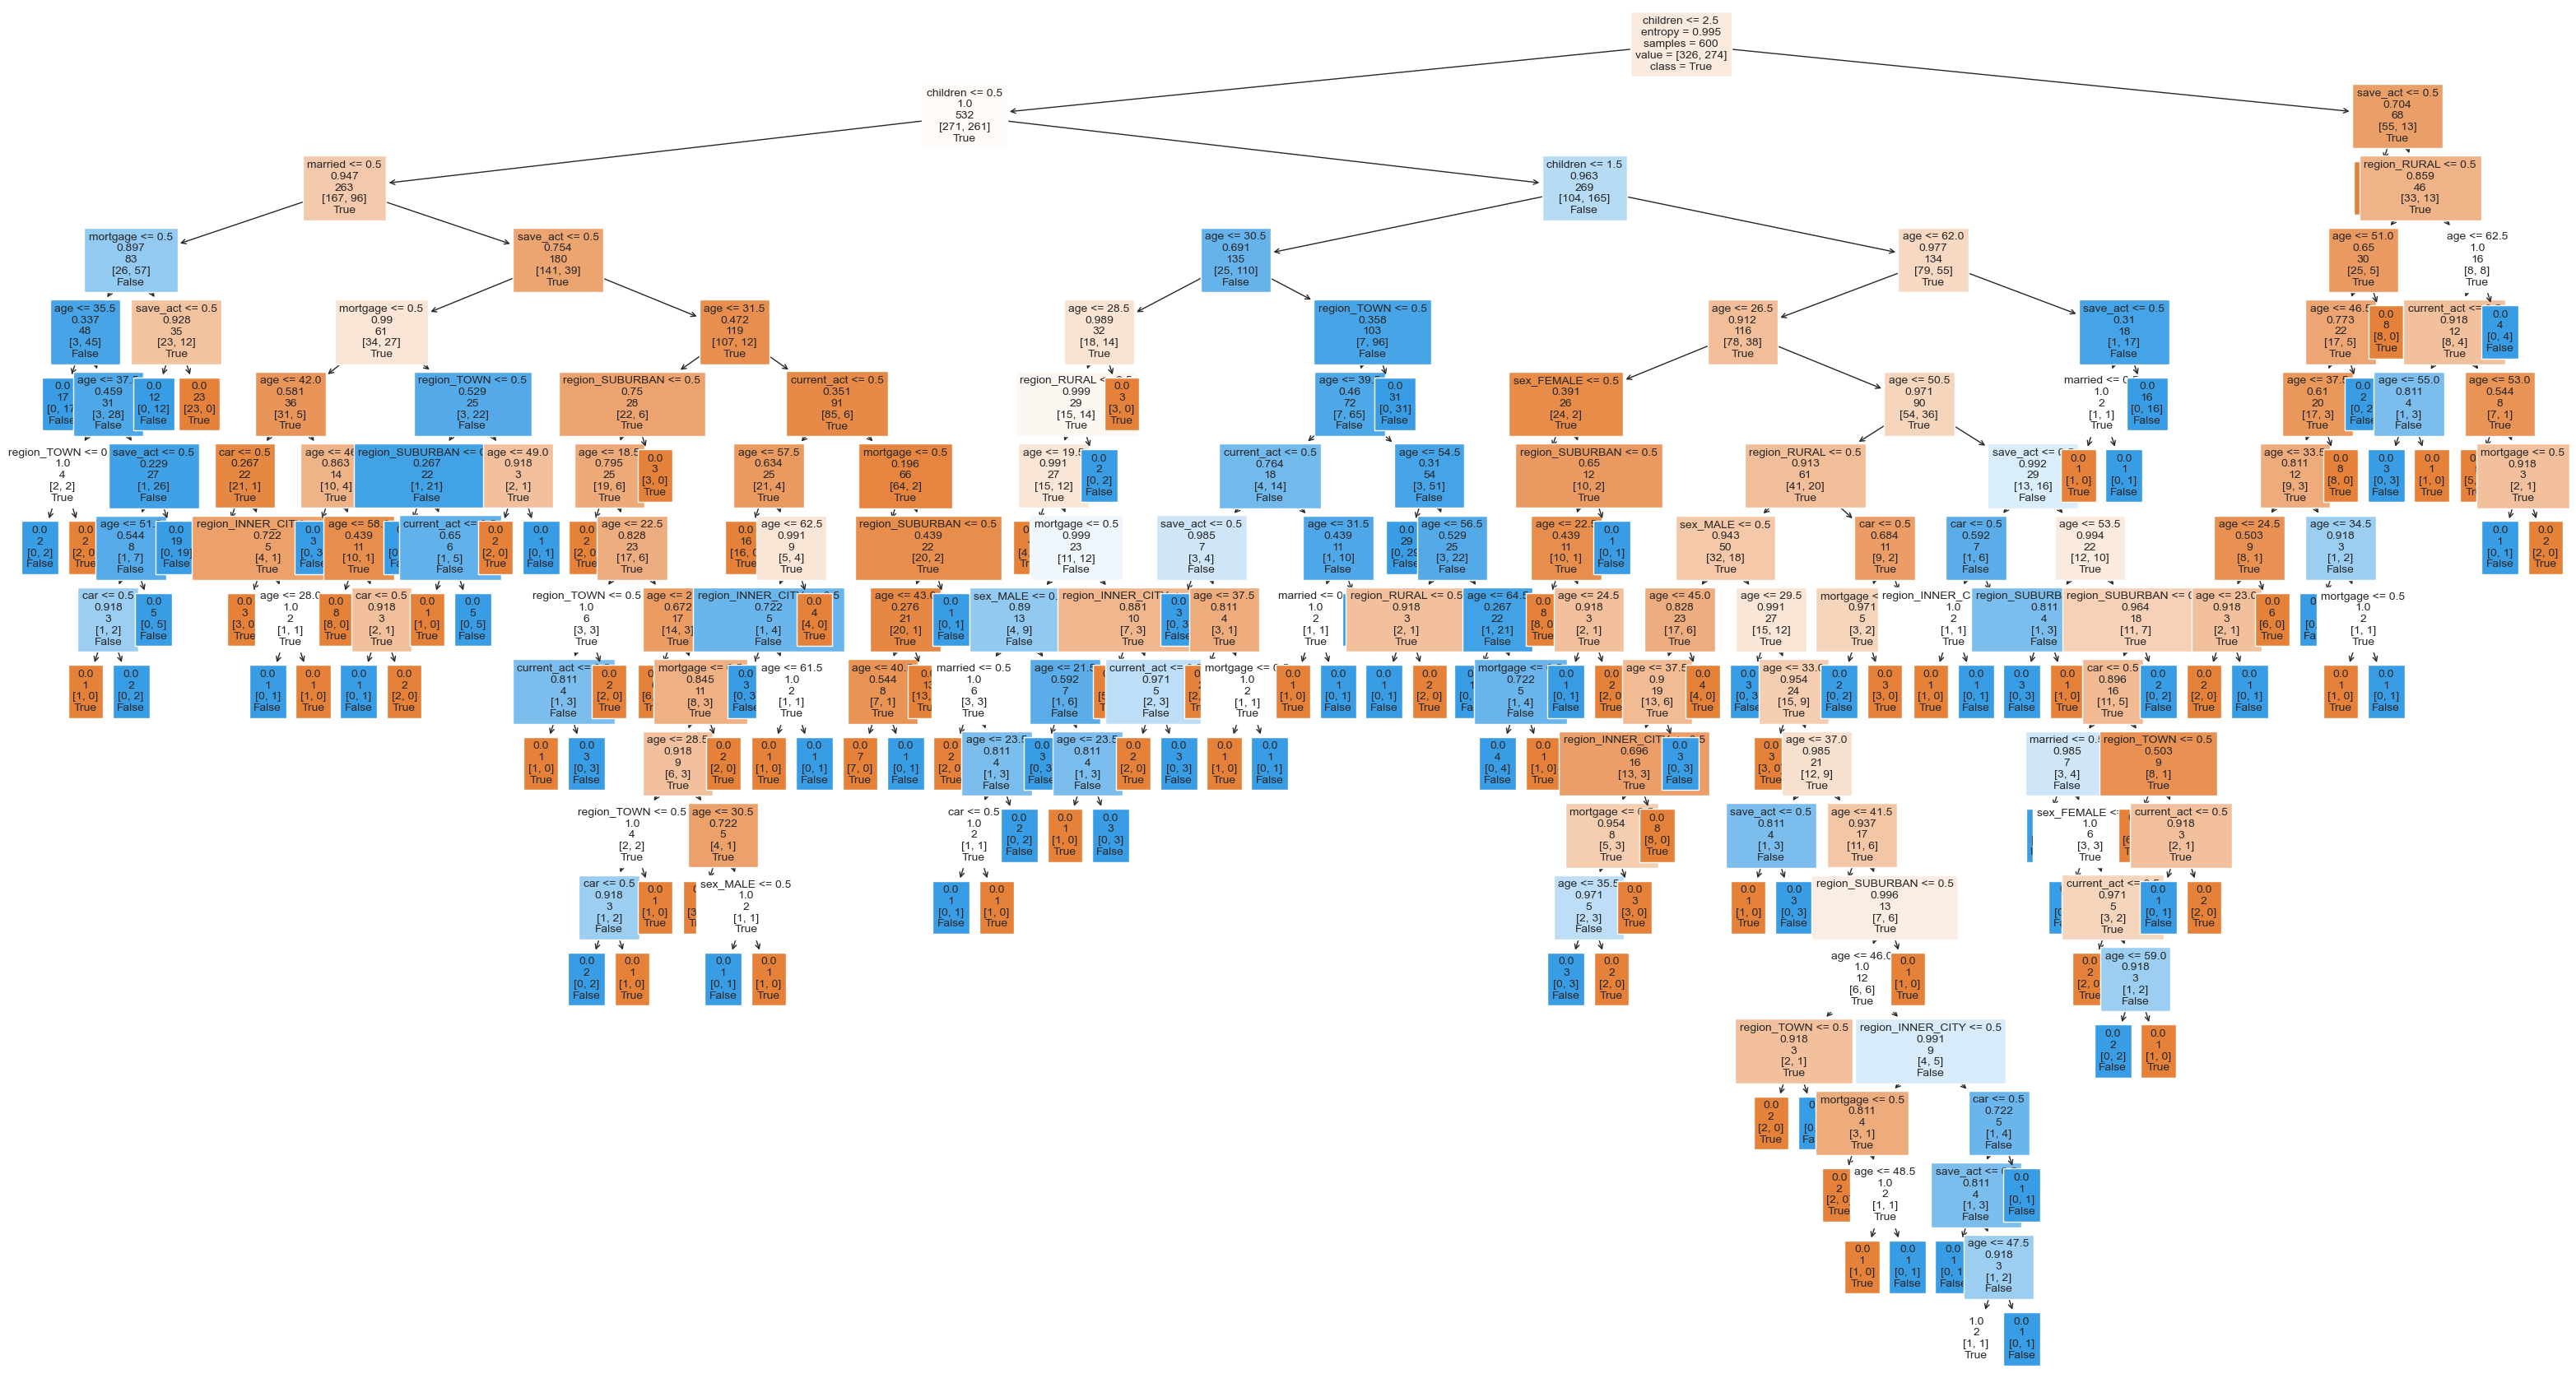

0.9983333333333333

In [136]:
X = training_df_dummy.drop(columns=['pep'])
x1=X.drop(columns=['income'])
x1.head()
y = training_df_dummy.pep

# varible to change depth of tree
#max_depth = int(input("What is the maximum depth you want? "))
clf = tree.DecisionTreeClassifier(min_samples_leaf = 1, criterion = 'entropy')

model = clf.fit(x1,y)

plt.figure(figsize = (40, 22), dpi = 100) # change dpi for size of image
tree.plot_tree(model, fontsize = 10, feature_names = x1.columns, impurity = True,class_names = ["True", "False"], label = 'root', filled = True)
plt.show()
clf.score(x1, y)

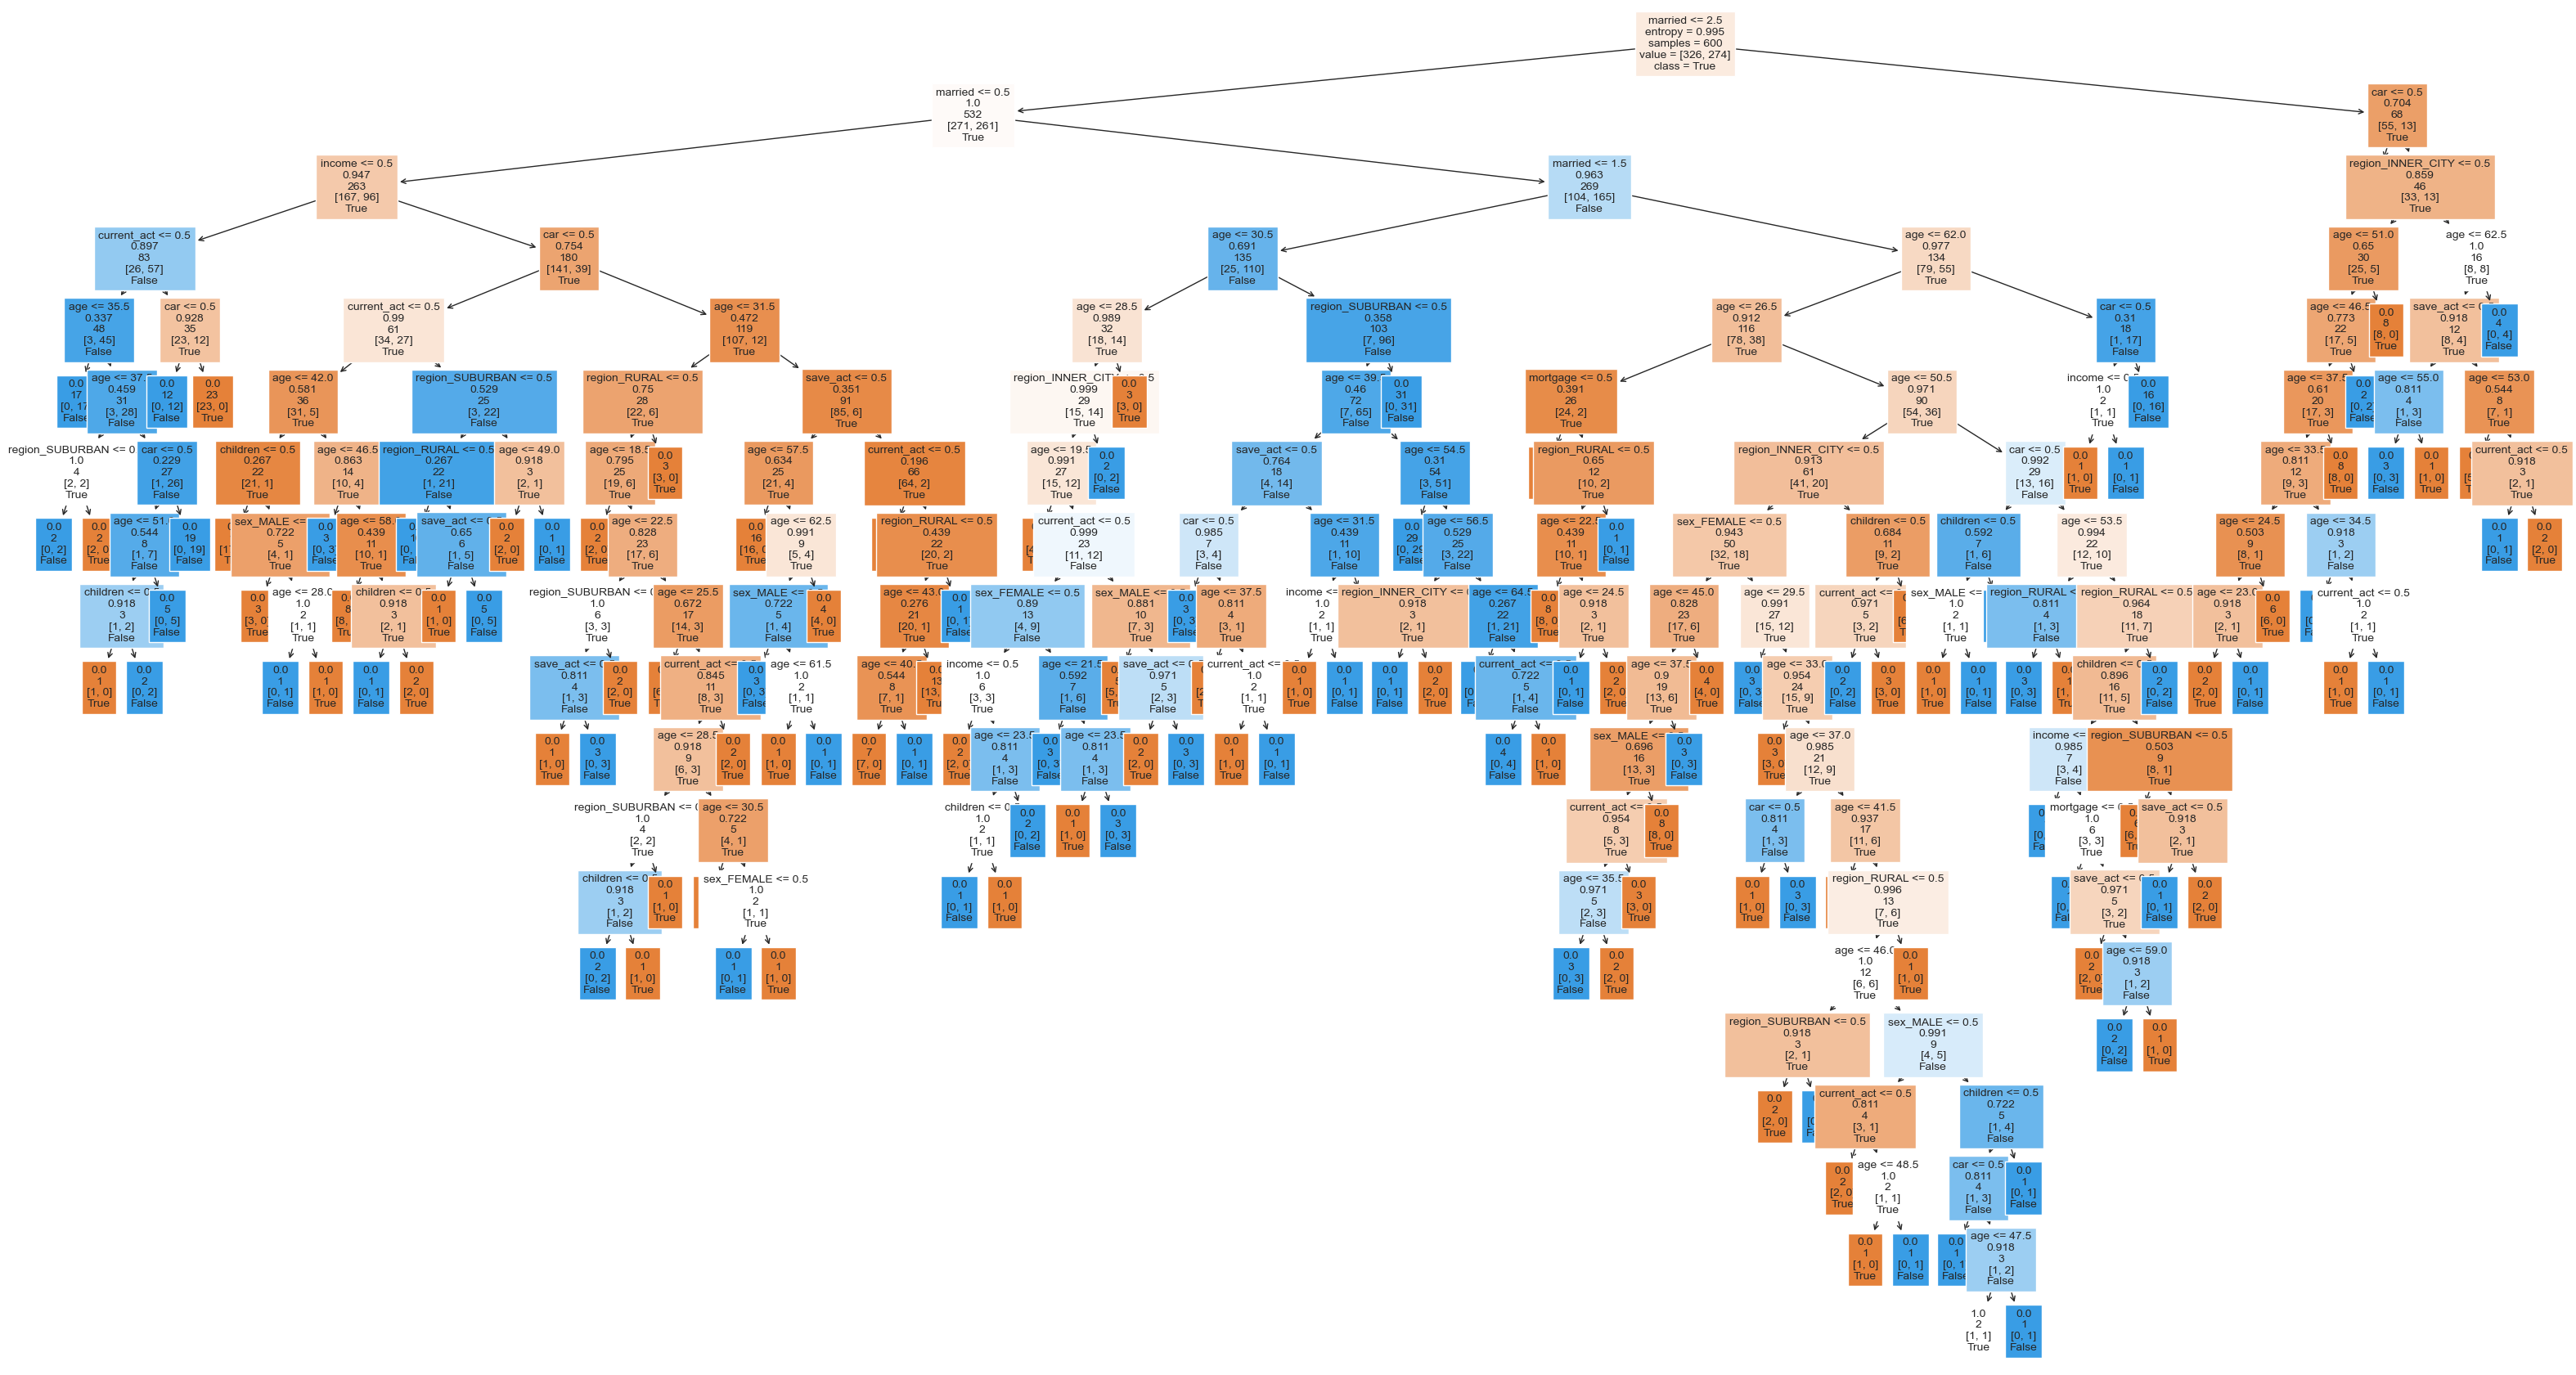

In [137]:
plt.figure(figsize = (40, 22), dpi = 100) # change dpi for size of image
tree.plot_tree(model, fontsize = 10, feature_names = X.columns, impurity = True,class_names = ["True", "False"], label = 'root', filled = True)
plt.show()

## Classification Accuracy

In [138]:
round(float(accuracy_score(model.predict(x1), y)),4)

0.9983

## Model Evaluation

In [139]:
y_test = testing_df_dummy.pep
X_test = testing_df_dummy.drop(columns=['pep'])
X_test = X_test.drop(columns=['income'])
predictions = model.predict(X_test)
predictions

array([False, False,  True,  True, False,  True, False,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True, False,  True, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False,

### Confusion Matrix

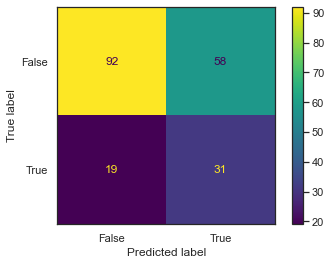

In [140]:
#Not good, overfitting occured
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### ROC Curve

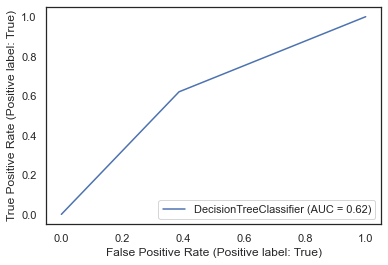

In [141]:
#Not good, overfitting occured
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()